[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module3_Files/Autoencoders_for_Images.ipynb)

# Autoencoders for Images
------------------------------------
**Dr. Dave Wanik - University of Connecticut**

Let's see how we can use dense layers, convolutional layers and pooling layers to shrink down a dataset into a smaller format. If we can do this, then we will have effectively built a compression algorithm for images! The concept of squishing information into a little ball ('latent vector') and then reconstructing something (itself or maybe another image or sequence) is a very useful application of deep learning. But for now - we are just interested in images.

* Example with Black and White Images
  * **Link:** https://blog.keras.io/building-autoencoders-in-keras.html

* Example with Color Images
  * **Link:** https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/

Beware that some examples use the Functional API - which has more flexibility than the Sequential API that we typically use - you should be able to follow along pretty easily, though.
  * **Link:** https://keras.io/guides/functional_api/


In [ ]:
# load the mnist data
# we don't need the y labels for this notebook
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# recall that each number is stored as a 28* 28 array
print(x_train[0].shape)
# take a look for yourself
x_train


(28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# we are going to flatten our images
# and eventually stick them into dense layers (no need for convolution yet)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Define the Model (simple autoencoder)
Our model is going to read in the flattened image. Then the encoded layer is going to squish it down into a 32 long vector. Then the dense layer is going to try to reconstruct the original 784 long vector from that 32 long vector.

The best part of this thing is the middle (where the input image is squished into a 32 long vector - tiny!)

We can imagine that our model will do OK - but that a little bit of information may be lost along the way (try making 784 things out of 32 things... this is tricky!)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats (elements)

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# to get this model to fit, we will use per-pixel binary cross-entropy loss
# because this is a grayscale image
# link: https://stats.stackexchange.com/questions/349096/cross-entropy-for-comparing-images
# for a color image, just use loss='mse'

# there is an implicit assumption along the lines of "black means class 0, white means class 1" and then some grey pixel value of 0.1 means the pixel very likely belongs to the black class
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

# Fit the model (simple autoencoder)

In [ ]:
# here we go!
autoencoder.fit(x_train, x_train, # notice how X and Y are both x_train
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 7s 24ms/step - loss: 0.2752 - val_loss: 0.1897
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1711 - val_loss: 0.1536
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1442 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1289 - val_loss: 0.1219
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1189 - val_loss: 0.1138
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1119 - val_loss: 0.1082
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1067 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1029 - val_loss: 0.1001
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1000 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0978 - val_lo

In [ ]:
# we could have used early stopping, but that's OK for now.

# Specify Individual Encoder and Decoder Models (simple autoencoder)
Note that we are not fitting these models - we will just call our `autoencoder` and use this to make our predictions.

In [ ]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Make a Prediction (simple autoencoder)
Let's use our model to predict the encoded and decoded images on x_test. Note how we are not using y ANYWHERE here.

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
# see what you did
print(encoded_imgs.shape) # wow. our 10K shapes have been stored as 32 long vectors
# and we also can also reconstruct them!
print(decoded_imgs.shape) # right back to 784 elements!

(10000, 32)
(10000, 784)


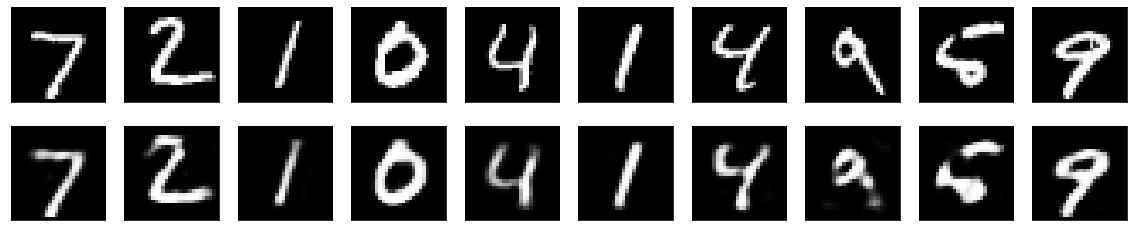

In [ ]:
# let's see how we did
# use Matplotlib
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The figures are a little grainy, but that's OK! It is still pretty impressive that a 32 long representation can create a 784 long representation. Let's see what the encoded images look like for this (we will reshape from a 32 long vector into a 4*8 array for convenience).

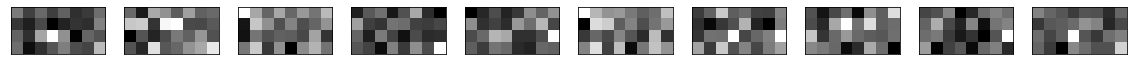

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1) # the website is off - don't forget i+1!
    plt.imshow(encoded_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# it is amazing that these gibberish pictures can be inputted into a decoder
# which turns them into pretty pictures

# Fit the Model (Deep Autoencoder)
*Just add more layers to the simple model!*

Yep - the only difference between a simple autoencoder and a dense autoencoder is the number of layers. Let's try this out.

In [ ]:
# we can simply add more layers to both the encoder and decoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

By showing the summary, we can see what this model is doing. Squishing down information into a tiny ball (latent vector) and then reconstructing it.

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.summary()

autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               1011

In [ ]:
# fit the model
autoencoder.fit(x_train, x_train,
                epochs=10, # on your own - try running for epochs and compare output images
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 0.2387 - val_loss: 0.1598
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1479 - val_loss: 0.1364
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1306 - val_loss: 0.1229
Epoch 4/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1205 - val_loss: 0.1158
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1146 - val_loss: 0.1113
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1106 - val_loss: 0.1077
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1077 - val_loss: 0.1051
Epoch 8/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1056 - val_loss: 0.1033
Epoch 9/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1039 - val_loss: 0.1018
Epoch 10/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1022 - val_lo

# Make a Prediction (deep autoencoder)
We will use the exact same code as above - we can evaluate our predictions (visually) in addition to the loss value that's printed above.

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# see what you did
print(encoded_imgs.shape) # wow. our 10K shapes have been stored as 32 long vectors
# and we also can also reconstruct them!
print(decoded_imgs.shape) # right back to 784 elements!

(10000, 32)
(10000, 784)


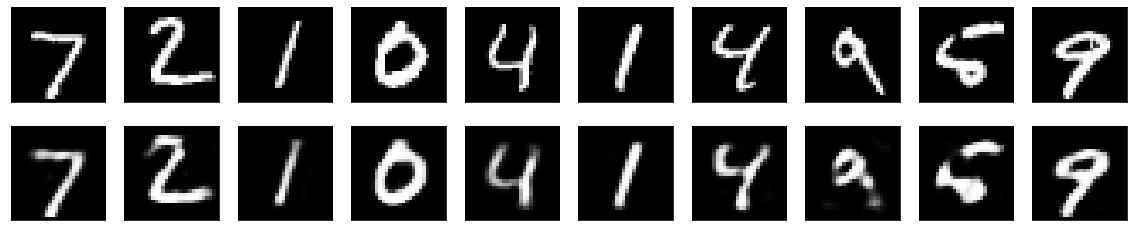

In [ ]:
# let's see how we did
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Ideally, these should look a little bit better than the simple example.

# Define the Model (convolutional autoencoder)
We don't have to flatten our image data like we did before - in fact, so long as it's stored as a proper 3D tensor (note the reshape operation later) we are ready to rock. Take that square (or rectangle) image and apply convolution and pooling to it until it is distilleed into a tiny nugget of information ('latent vector') - then build a model to reconstruct the original image from that nugget!

Instead of pooling, check out 'upsampling' (just doubles the rows in an array):
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D
* https://machinelearningmastery.com/upsampling-and-transpose-convolution-layers-for-generative-adversarial-networks/

[from Brownlee] By default, the UpSampling2D will double each input dimension. This is defined by the ‘size‘ argument that is set to the tuple (2,2).

You may want to use different factors on each dimension, such as double the width and triple the height. This could be achieved by setting the ‘size‘ argument to (2, 3). The result of applying this operation to a 2×2 image would be a 4×6 output image (e.g. 2×2 and 2×3).

In [ ]:
# here we go

# let's re-read in the data so it's the original format
# of arrays
(x_train, _), (x_test, _) = mnist.load_data()

(28, 28)


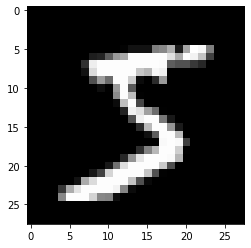

In [ ]:
# plot an original number
from matplotlib import pyplot as plt
print(x_train[0].shape)
plt.imshow(x_train[0], interpolation='nearest')
plt.show()

In [ ]:
# and let's make sure we scale everything between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

(28, 28)


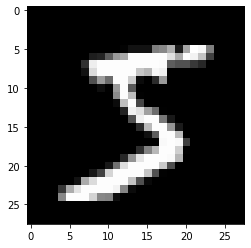

In [ ]:
# take a peak at one of the samples
# link: https://stackoverflow.com/questions/34774954/how-to-extract-2d-array-from-4d-array-based-on-first-and-last-indices
print(x_train[0, :, :, 0].shape)

plt.imshow(x_train[0, :, :, 0], interpolation='nearest')
plt.show()

# same image - just different values within (since we normalize by a constant!)

In [ ]:
# here comes our model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

# Fit the Model (convolutional autoencoder)
Warning: This may take a bit to run (1 min per epoch)! Set epochs to 10 if you want it to run faster - or use EarlyStopping.

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10, # you can run 50 on your own (will take a long time!)
                batch_size=500, # you can use a smaller batch size like 128 if you want more detail
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
120/120 [==============================] - 70s 580ms/step - loss: 0.1617 - val_loss: 0.1531
Epoch 2/10
120/120 [==============================] - 67s 560ms/step - loss: 0.1481 - val_loss: 0.1412
Epoch 3/10
120/120 [==============================] - 69s 572ms/step - loss: 0.1382 - val_loss: 0.1336
Epoch 4/10
120/120 [==============================] - 67s 558ms/step - loss: 0.1321 - val_loss: 0.1285
Epoch 5/10
120/120 [==============================] - 69s 572ms/step - loss: 0.1279 - val_loss: 0.1250
Epoch 6/10
120/120 [==============================] - 67s 557ms/step - loss: 0.1248 - val_loss: 0.1222
Epoch 7/10
120/120 [==============================] - 68s 569ms/step - loss: 0.1223 - val_loss: 0.1200
Epoch 8/10
120/120 [==============================] - 67s 558ms/step - loss: 0.1202 - val_loss: 0.1180
Epoch 9/10
120/120 [==============================] - 67s 557ms/step - loss: 0.1184 - val_loss: 0.1165
Epoch 10/10
120/120 [==============================] - 69s 571ms/step - l

# Make a Prediction (convolutional autoencoder)

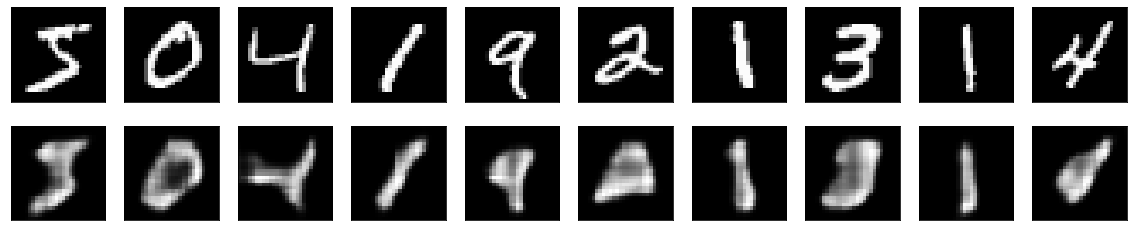

In [ ]:
# we will continue to look at train samples
decoded_imgs = autoencoder.predict(x_train)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

They will probably look pretty good if you run for enough epochs!

# Denoising (optional)
Students are welcome to check out the denoising section of the Chollet blog post on their own - it's pretty amazing that dirty images can be cleaned up! The trick is to feed the model artificially dirty data, and then have it recreate the clean data. You need to show the model BOTH the dirty (input) and clean (target) data - and then it will be able to clean up any related dirty image. So not only can these models predict themselves (that's the 'auto' part in auto-encoder) - they can also predict and recreate other data (simply known as encoder/decoder at this point). Enjoy.